In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from skimage.io import imread
import os
from glob import glob
%matplotlib inline 
from collections import Counter
import shutil


In [14]:
base_bone_dir = os.path.join('/Users/asmitha/Documents')
age_df = pd.read_excel(os.path.join(base_bone_dir, 'Anemia_dataset_train.xlsx'), sheet_name = 'Sheet1')

In [15]:
age_df.head()

,Unnamed: 0,index,Total Serial Number,S No.,Unique ID,Blood Sample ID,Haemoglobin (in mg/dl),Age (in years),Gender
0,0,0.0,1,1,NaN,2024030518,10.5,75,Female
1,1,2.0,3,3,NaN,2024030549,13.2,65,Male
2,2,3.0,4,4,NaN,2024030516,13.1,44,Female
3,3,4.0,6,6,NaN,202403054,10.4,70,Male
4,4,5.0,7,7,NaN,2024030523,9.7,70,Male


In [16]:
age_df.rename(columns={age_df.columns[6]: 'Hb'}, inplace=True)

In [17]:
age_df.head()

,Unnamed: 0,index,Total Serial Number,S No.,Unique ID,Blood Sample ID,Hb,Age (in years),Gender
0,0,0.0,1,1,NaN,2024030518,10.5,75,Female
1,1,2.0,3,3,NaN,2024030549,13.2,65,Male
2,2,3.0,4,4,NaN,2024030516,13.1,44,Female
3,3,4.0,6,6,NaN,202403054,10.4,70,Male
4,4,5.0,7,7,NaN,2024030523,9.7,70,Male


In [18]:
label_counts = Counter(age_df['Hb'])

print(label_counts)

Counter({12.4: 19, 10.5: 17, 10.4: 15, 12.1: 15, 9.9: 12, 10.9: 12, 11.1: 11, 11.8: 10, 10.8: 10, 14.1: 9, 13.9: 9, 13.1: 8, 13.8: 8, 9.0: 8, 11.4: 7, 10.2: 7, 9.7: 6, 11.5: 6, 9.1: 6, 12.8: 6, 9.8: 6, 13.2: 5, 11.9: 5, 12.5: 5, 9.5: 5, 12.9: 5, 10.0: 4, 15.2: 4, 14.0: 4, 10.7: 4, 12.7: 4, 11.6: 4, 9.2: 4, 11.2: 4, 13.6: 3, 12.2: 3, 10.6: 3, 10.1: 3, 14.5: 3, 9.4: 3, 9.3: 3, 11.3: 3, 13.5: 3, 8.5: 3, 15.8: 3, 8.9: 3, 7.0: 3, 13.4: 2, 15.1: 2, 8.4: 2, 9.6: 2, 15.4: 2, 11.0: 2, 14.8: 2, 11.7: 2, 12.3: 2, 14.7: 1, 12.0: 1, 12.6: 1, 14.3: 1, 8.8: 1, 16.1: 1, 14.9: 1, 7.9: 1, 15.9: 1, 7.8: 1, 8.7: 1, 8.1: 1, 13.3: 1, 14.2: 1, 7.6: 1, 10.3: 1, 7.1: 1, 3.7: 1, 13.7: 1})


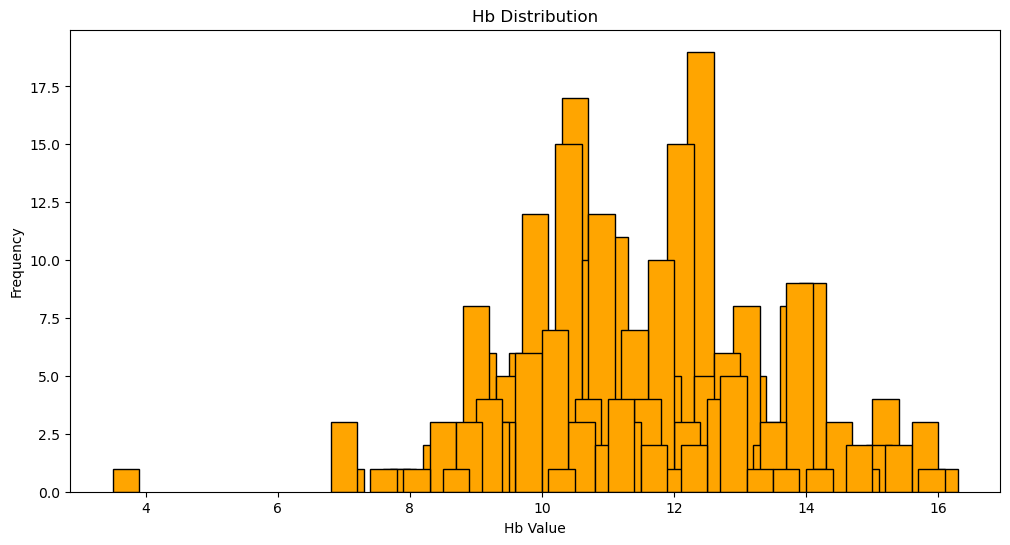

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(label_counts.keys(), label_counts.values(), color='orange', width=0.4, edgecolor='black')
plt.xlabel("Hb Value")
plt.ylabel("Frequency")
plt.title("Hb Distribution")
plt.show()

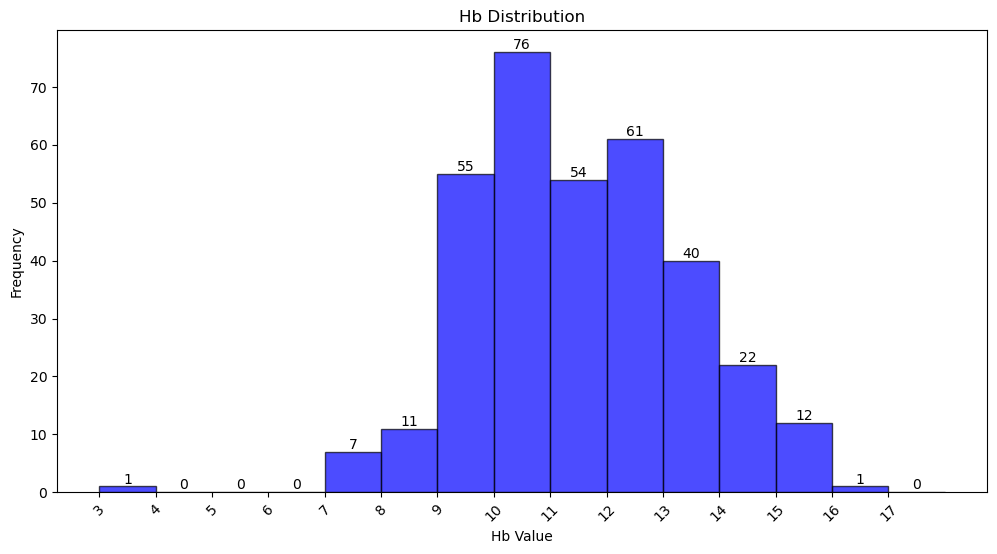

In [26]:
hb_values = age_df['Hb']
min_value = int(np.floor(min(hb_values))) 
max_value = int(np.ceil(max(hb_values)))
bins = np.arange(min_value, max_value + 2) 

plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(hb_values, bins=bins, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel("Hb Value")
plt.ylabel("Frequency")
plt.title("Hb Distribution")

tick_labels = [f'{i}' for i in range(min_value, max_value + 1)]
plt.xticks(np.arange(min_value, max_value + 1), tick_labels, rotation=45)

for patch, count in zip(patches, counts):
    x_pos = patch.get_x() + patch.get_width() / 2
    plt.text(x_pos, patch.get_height(), f'{int(count)}', ha='center', va='bottom', fontsize=10)

plt.show()